# **Analysis of the impact of the environmental variables on the death rate in developing and developed countries**



**Group Members:**
1. Sara Mahmood
2. Fasih Hussain
3. Rabeea Atif Rana

**Countries chosen:**

Developed Countries: China and US

Developing Countries: Pakistan and Bangladesh


**Variables Analysed:**

1. Death rate and CO2 emissions
2. Death rate and Water Quality
3. Death rate and PM2.5
4. Death rate and Sanitation
5. Death rate and health expenditure

In [ ]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

****




# Column Names:
Year<br>
CountryName<br>
CO2 emissions (metric tons per capita): CO2Emissions<br>
Health expenditure, total (% of GDP): HealthExpenditure<br>
Death rate, crude (per 1,000 people): DeathRate<br>
Life expectancy at birth, total (years): LifeExpectancy<br>
Improved water source (% of population with access): ImprovedWaterSources<br>
Improved sanitation facilities (% of population with access): ImprovedSanitationFacilities<br>
PM2.5 air pollution, mean annual exposure (micrograms per cubic meter): PM2.5AirPollution

# Data Loading

In [ ]:
# Loading data from csv
data = pd.read_csv('Data_20YearTimeSeries.csv')
data = data.drop(columns=['CCode', 'ICode'])

data.head(5)

,CName,IName,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Bangladesh,Net ODA received (% of GNI),5.946642263,5.67298284,4.199778687,4.99230555,3.278379,2.932553053,2.317258122,2.554453116,2.579988823,2.400561,2.146450097,1.821421572,2.546453403,2.374527125,2.081673,1.851611969,2.060906671,2.390829337,1.257445485,1.289898,1.220708,1.685637
1,Brazil,Net ODA received (% of GNI),0.040571613,-0.067273152,0.046729733,0.046794033,0.035798,0.0326374,0.030392072,0.034186768,0.021669932,0.036908,0.041092225,0.042698835,0.03709298,0.023980719,0.028367,0.010680851,0.023993362,0.028515885,0.02121569,0.021541,0.033560,0.058095
2,China,Net ODA received (% of GNI),0.508160929,0.707864694,0.730135841,0.562284855,0.484573,0.31293156,0.217426097,0.243172522,0.223339809,0.144597,0.118642118,0.104023789,0.083187377,0.089059884,0.080967,0.046084147,0.042487075,0.032513793,0.022667722,0.010942,-0.009692,-0.002372
3,Ethiopia,Net ODA received (% of GNI),8.216968569,11.23264698,12.46920634,15.64341134,11.616290,9.669071467,6.576755438,8.248928088,8.271715405,8.549392,13.72695092,17.25812074,19.34624774,18.48597177,15.868739,13.57944167,13.46124136,12.9886168,13.56258619,13.447558,11.845161,7.856446
4,France,Net ODA received (% of GNI),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning

**Changing Shape of the Data**

In [ ]:
# Changing data shape
data = data.loc[data['IName'].isin(['CO2 emissions (metric tons per capita)', 'Health expenditure, total (% of GDP)', 'Death rate, crude (per 1,000 people)', 'Improved water source (% of population with access)', 'Improved sanitation facilities (% of population with access)', 'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)'])]

transform = []

for country in data['CName'].unique():
    values = np.array(data[(data['CName']==country)]).T[2:]
    arr = np.zeros((len(values), len(values[0])+2), dtype='object')
    arr[:, 2:] = values
    arr[:, 0] = country
    arr[:, 1] = range(1991, 2013)
    transform.append(arr)

transform = np.concatenate(transform)

data = pd.DataFrame(transform, columns = ['CountryName', 'Year', 'CO2Emissions', 'HealthExpenditure', 'DeathRate', 'ImprovedWaterSources', 'ImprovedSanitationFacilities', 'PM2.5AirPollution'])

data.head(5)

,CountryName,Year,CO2Emissions,HealthExpenditure,DeathRate,ImprovedWaterSources,ImprovedSanitationFacilities,PM2.5AirPollution
0,Bangladesh,1991,0.144999395,NaN,9.728,NaN,NaN,..
1,Bangladesh,1992,0.157859354,NaN,9.401,NaN,NaN,..
2,Bangladesh,1993,0.151502361,NaN,9.083,NaN,NaN,..
3,Bangladesh,1994,0.161621139,NaN,8.775,NaN,NaN,..
4,Bangladesh,1995,0.190341,3.52965,8.479,72.0629,39.039,61.8031


**Dropping irrelevant columns from the dataset**

In [ ]:
data.shape

(440, 8)

**Data cleaning and removing anomolies (We have "..." in several places in the dataset. This is being replaced with NaN)**

In [ ]:
# Removing .. from the data
data = data.replace(['..'], np.NaN)

**Exploring and converting data types**

In [ ]:
# Setting data type to numeric
for col in data.columns:
    if col != 'CountryName':
        data[col] = pd.to_numeric(data[col])

data.dtypes

CountryName                      object
Year                              int64
CO2Emissions                    float64
HealthExpenditure               float64
DeathRate                       float64
ImprovedWaterSources            float64
ImprovedSanitationFacilities    float64
PM2.5AirPollution               float64
dtype: object

**Discovering and handling the missing values**

In [ ]:
# Checking for missing values
data.isnull().sum()

CountryName                       0
Year                              0
CO2Emissions                     44
HealthExpenditure                99
DeathRate                         0
ImprovedWaterSources            341
ImprovedSanitationFacilities    341
PM2.5AirPollution               320
dtype: int64

In [ ]:
# Handling missing values in data
def interpolate(data):
    if data.notnull().sum() > 1:
        return data.interpolate(method='linear').ffill().bfill()
    else:
        return data.ffill().bfill()

data = data.transform(interpolate)

data.head(5)

,CountryName,Year,CO2Emissions,HealthExpenditure,DeathRate,ImprovedWaterSources,ImprovedSanitationFacilities,PM2.5AirPollution
0,Bangladesh,1991,0.144999,3.52965,9.728,72.062879,39.039047,61.803144
1,Bangladesh,1992,0.157859,3.52965,9.401,72.062879,39.039047,61.803144
2,Bangladesh,1993,0.151502,3.52965,9.083,72.062879,39.039047,61.803144
3,Bangladesh,1994,0.161621,3.52965,8.775,72.062879,39.039047,61.803144
4,Bangladesh,1995,0.190341,3.52965,8.479,72.062879,39.039047,61.803144


In [ ]:
# Checking for missing values
data.isnull().sum()

CountryName                     0
Year                            0
CO2Emissions                    0
HealthExpenditure               0
DeathRate                       0
ImprovedWaterSources            0
ImprovedSanitationFacilities    0
PM2.5AirPollution               0
dtype: int64

**Filtering out Developed and Developing Countries**

In [ ]:
data = pd.DataFrame(data[(data['CountryName'] == 'China' ) | (data['CountryName'] == 'Pakistan') | (data['CountryName'] == 'United States')  | (data['CountryName'] == 'Bangladesh') ])
data['Status'] = data.CountryName.apply(lambda x: 'developed' if x in ['China', 'United States'] else 'developing')
data

#seprate dfs for dev and un-dev to be used as per need
developed = pd.DataFrame(data[(data['CountryName'] == 'China' ) | (data['CountryName'] == 'United States')])
developing = pd.DataFrame(data[(data['CountryName'] == 'Bangladesh') | (data['CountryName'] == 'Pakistan')])

data

,CountryName,Year,CO2Emissions,HealthExpenditure,DeathRate,ImprovedWaterSources,ImprovedSanitationFacilities,PM2.5AirPollution,Status
0,Bangladesh,1991,0.144999,3.529650,9.728,72.062879,39.039047,61.803144,developing
1,Bangladesh,1992,0.157859,3.529650,9.401,72.062879,39.039047,61.803144,developing
2,Bangladesh,1993,0.151502,3.529650,9.083,72.062879,39.039047,61.803144,developing
3,Bangladesh,1994,0.161621,3.529650,8.775,72.062879,39.039047,61.803144,developing
4,Bangladesh,1995,0.190341,3.529650,8.479,72.062879,39.039047,61.803144,developing
...,...,...,...,...,...,...,...,...,...
413,United States,2008,18.602273,16.536135,8.200,99.070230,99.906582,9.459112,developed
414,United States,2009,17.315297,17.714795,8.400,99.096988,99.925629,9.408874,developed
415,United States,2010,17.564164,17.657207,8.000,99.123745,99.944677,9.358636,developed
416,United States,2011,11.809653,17.682976,8.066,99.146215,99.962643,9.740641,developed


# Understanding the Data - EDA

**Current data types**

In [ ]:
data.dtypes

CountryName                      object
Year                              int64
CO2Emissions                    float64
HealthExpenditure               float64
DeathRate                       float64
ImprovedWaterSources            float64
ImprovedSanitationFacilities    float64
PM2.5AirPollution               float64
Status                           object
dtype: object

**Total number of countries under analysis**

In [ ]:
data.CountryName.nunique()

4

**Descriptive statistics - Seeing the variation in each variables under consideration**

In [ ]:
data.describe()

,Year,CO2Emissions,HealthExpenditure,DeathRate,ImprovedWaterSources,ImprovedSanitationFacilities,PM2.5AirPollution
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,2001.500000,5.913207,6.601287,7.607648,86.846509,59.415630,49.287337
std,6.380646,7.614305,4.898639,1.043737,9.155374,24.925301,23.948777
min,1991.000000,0.144999,2.733933,5.736000,68.594345,28.665912,9.003163
25%,1996.000000,0.641334,3.357682,6.640000,78.967925,40.453970,20.811516
50%,2001.500000,2.280054,4.201042,7.449000,87.854875,48.766294,61.800958
75%,2007.000000,7.389786,8.684723,8.500000,94.233820,78.845341,65.264660
max,2012.000000,20.249189,17.909058,9.835000,99.721647,99.980610,70.793909


**Are there any null values in the data?**

In [ ]:
data.isnull().sum()

CountryName                     0
Year                            0
CO2Emissions                    0
HealthExpenditure               0
DeathRate                       0
ImprovedWaterSources            0
ImprovedSanitationFacilities    0
PM2.5AirPollution               0
Status                          0
dtype: int64

**1. Top 5 instances of CO2 emission over the years**

In [ ]:
df = data.groupby(['Year', 'CountryName', 'Status'], as_index=False)['CO2Emissions'].\
    mean().dropna().sort_values('CO2Emissions', ascending=False)
df.head(5)

,Year,CountryName,Status,CO2Emissions
39,2000,United States,developed,20.249189
27,1997,United States,developed,19.876405
35,1999,United States,developed,19.824009
31,1998,United States,developed,19.778914
55,2004,United States,developed,19.776845


In [ ]:
data.corr()

,Year,CO2Emissions,HealthExpenditure,DeathRate,ImprovedWaterSources,ImprovedSanitationFacilities,PM2.5AirPollution
Year,1.000000,0.014852,0.074608,-0.510645,0.338409,0.171531,0.160003
CO2Emissions,0.014852,1.000000,0.901867,0.392661,0.793316,0.928052,-0.909819
HealthExpenditure,0.074608,0.901867,1.000000,0.403610,0.757047,0.933430,-0.953642
DeathRate,-0.510645,0.392661,0.403610,1.000000,0.195422,0.246143,-0.481457
ImprovedWaterSources,0.338409,0.793316,0.757047,0.195422,1.000000,0.829073,-0.730322
ImprovedSanitationFacilities,0.171531,0.928052,0.933430,0.246143,0.829073,1.000000,-0.902198
PM2.5AirPollution,0.160003,-0.909819,-0.953642,-0.481457,-0.730322,-0.902198,1.000000


In [ ]:
ch = data.loc[data['CountryName'] == "China"]
us = data.loc[data['CountryName'] == "United States"]
pk = data.loc[data['CountryName'] == "Pakistan"]
bgd = data.loc[data['CountryName'] == "Bangladesh"]



# **GENERAL TREND ANALYSIS OVER THE YEARS OF ALL THE VARIABLES**

## 1. Death Rate Trend Analysis in Developed and Developing Countries


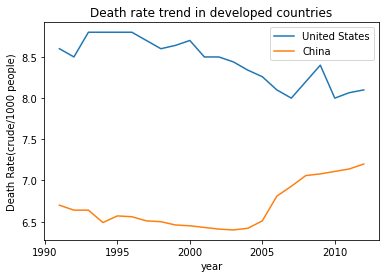

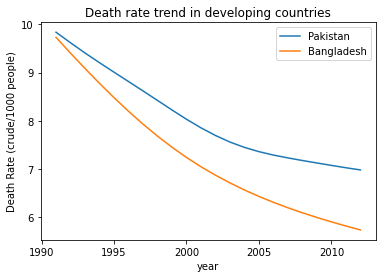

In [ ]:
data.rename(columns={'Death rate, crude (per 1,000 people)':'DeathRate'}, inplace=True)
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
 
# DEVELOPED COUNTRIES
for name in ['United States','China']:
    ax.plot(data[data.CountryName==name].Year,data[data.CountryName==name].DeathRate,label=name)
 
ax.set_xlabel("year")
ax.set_ylabel("Death Rate(crude/1000 people)")
ax.set_title('Death rate trend in developed countries')
ax.legend(loc='best')
 
fig,ax1 = plt.subplots()
 
# UNDER-DEVELOPED COUNTRIES
for name in ['Pakistan','Bangladesh']:
    ax1.plot(data[data.CountryName==name].Year,data[data.CountryName==name].DeathRate,label=name)
 
ax1.set_xlabel("year")
ax1.set_ylabel("Death Rate (crude/1000 people)")
ax1.set_title('Death rate trend in developing countries')
ax1.legend(loc='best')
 
# fig,ax2 = plt.subplots()
# ax2 = data.plot.scatter(data[data.CountryName==name].Year,data[data.CountryName==name].DeathRate,label=name)

Developed = the resources have been maintained and thus no significant increase or decrease is observed

Developing = work is being done to decrease the death rate

## 2. PM2.5 and CO2 trend Analysis in Developed and Developing Countries

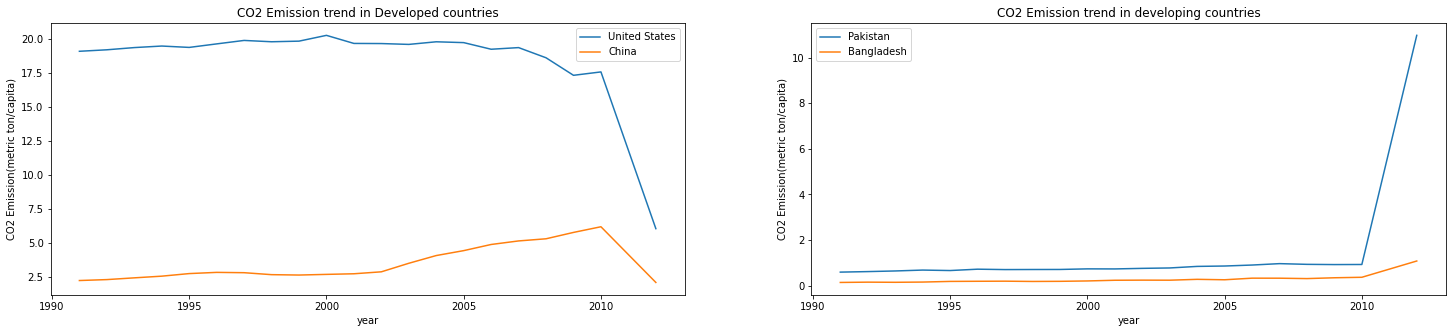

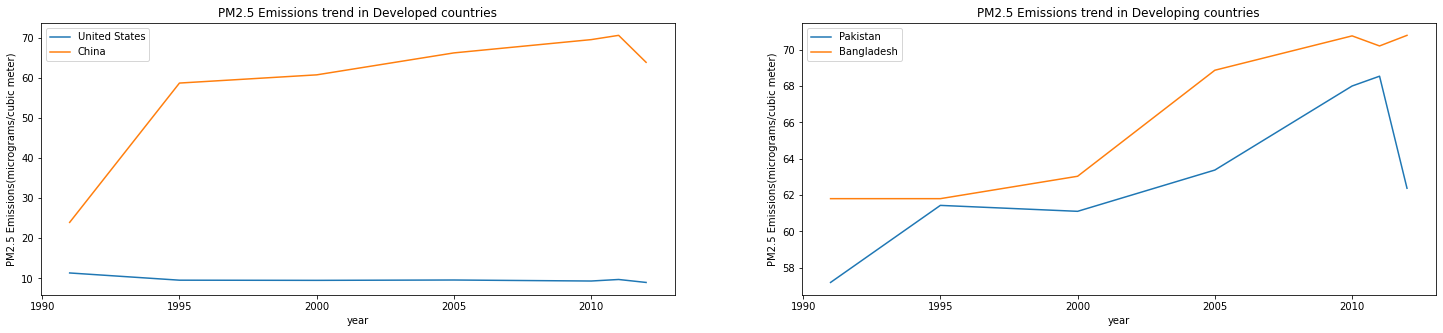

In [ ]:
data.rename(columns={'CO2 emissions (metric tons per capita)':'CO2emissions'}, inplace=True)
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(25, 5))

# DEVELOPED COUNTRIES
for name in ['United States','China']:
    ax[0].plot(data[data.CountryName==name].Year,data[data.CountryName==name].CO2Emissions,label=name)

ax[0].set_xlabel("year")
ax[0].set_ylabel("CO2 Emission(metric ton/capita)")
ax[0].set_title('CO2 Emission trend in Developed countries')
ax[0].legend(loc='best')

# UNDER-DEVELOPED COUNTRIES
for name in ['Pakistan','Bangladesh']:
    ax[1].plot(data[data.CountryName==name].Year,data[data.CountryName==name].CO2Emissions,label=name)

ax[1].set_xlabel("year")
ax[1].set_ylabel("CO2 Emission(metric ton/capita)")
ax[1].set_title('CO2 Emission trend in developing countries')
ax[1].legend(loc='best')

fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(25, 5))
# DEVELOPED COUNTRIES
for name in ['United States','China']:
    ax[0].plot(data[data.CountryName==name].Year,data[data.CountryName==name]["PM2.5AirPollution"],label=name)

ax[0].set_xlabel("year")
ax[0].set_ylabel("PM2.5 Emissions(micrograms/cubic meter)")
ax[0].set_title('PM2.5 Emissions trend in Developed countries')
ax[0].legend(loc='best')

# UNDER-DEVELOPED COUNTRIES
for name in ['Pakistan','Bangladesh']:
    ax[1].plot(data[data.CountryName==name].Year,data[data.CountryName==name]["PM2.5AirPollution"],label=name)

ax[1].set_xlabel("year")
ax[1].set_ylabel("PM2.5 Emissions(micrograms/cubic meter)")
ax[1].set_title('PM2.5 Emissions trend in Developing countries')
ax[1].legend(loc='best')


## 3. Improved Sanitation and Water Quality Analysis in Developed and Developing Countries

**For Improved Sanitation and Improved Water Quality**

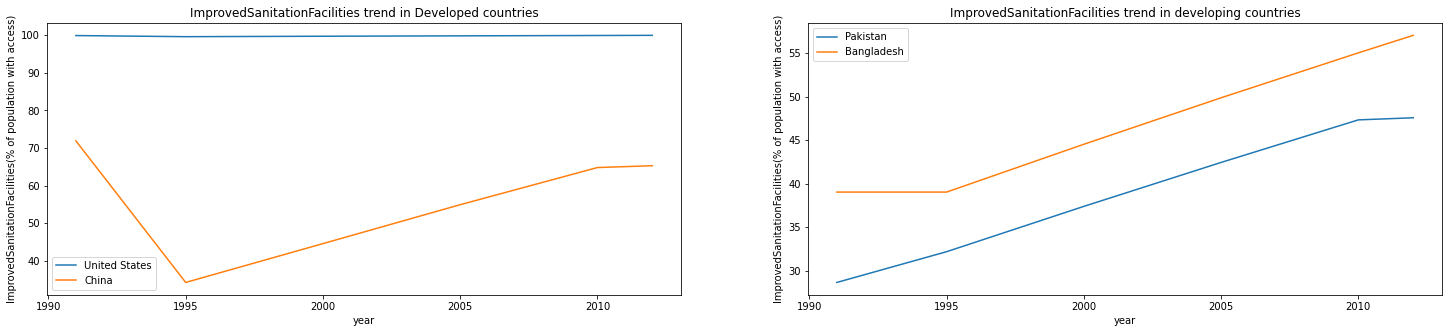

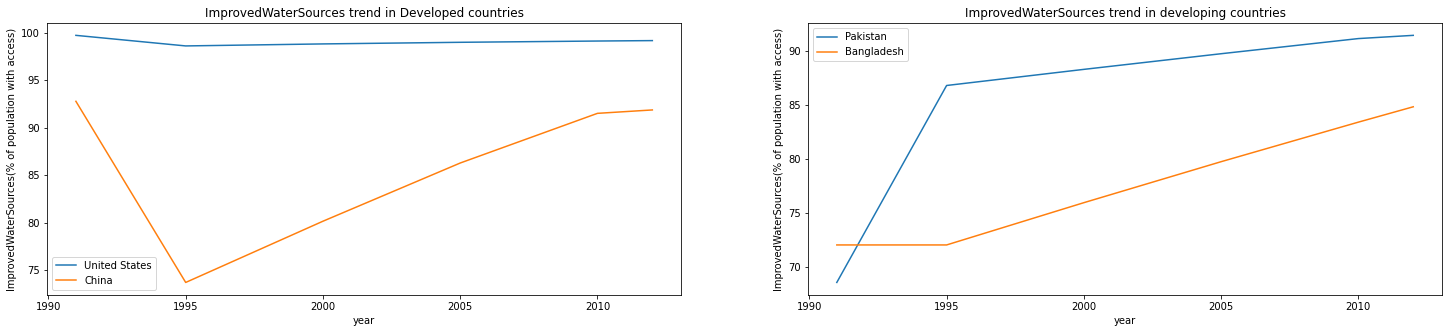

In [ ]:
#####################EXCEL DATA MISSING - SAME PLOTS AS ABOVE
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(25, 5))
for name in ['United States','China']:
    ax[0].plot(data[data.CountryName==name].Year,data[data.CountryName==name].ImprovedSanitationFacilities,label=name)

ax[0].set_xlabel("year")
ax[0].set_ylabel("ImprovedSanitationFacilities(% of population with access)")
ax[0].set_title('ImprovedSanitationFacilities trend in Developed countries')
ax[0].legend(loc='best')


for name in ['Pakistan','Bangladesh']:
    ax[1].plot(data[data.CountryName==name].Year,data[data.CountryName==name].ImprovedSanitationFacilities,label=name)

ax[1].set_xlabel("year")
ax[1].set_ylabel("ImprovedSanitationFacilities(% of population with access)")
ax[1].set_title('ImprovedSanitationFacilities trend in developing countries')
ax[1].legend(loc='best')


fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(25, 5))
for name in ['United States','China']:
    ax[0].plot(data[data.CountryName==name].Year,data[data.CountryName==name].ImprovedWaterSources,label=name)

ax[0].set_xlabel("year")
ax[0].set_ylabel("ImprovedWaterSources(% of population with access)")
ax[0].set_title('ImprovedWaterSources trend in Developed countries')
ax[0].legend(loc='best')

for name in ['Pakistan','Bangladesh']:
    ax[1].plot(data[data.CountryName==name].Year,data[data.CountryName==name].ImprovedWaterSources,label=name)

ax[1].set_xlabel("year")
ax[1].set_ylabel("ImprovedWaterSources(% of population with access)")
ax[1].set_title('ImprovedWaterSources trend in developing countries')
ax[1].legend(loc='best')

# Analysing the relation between Air pollutants (CO2 and PM2.5) on the death rate in developing and under-developed countries. Which one proved to be more deadly?


Let's first see the distribution of the two gases in the developed and the developing countries


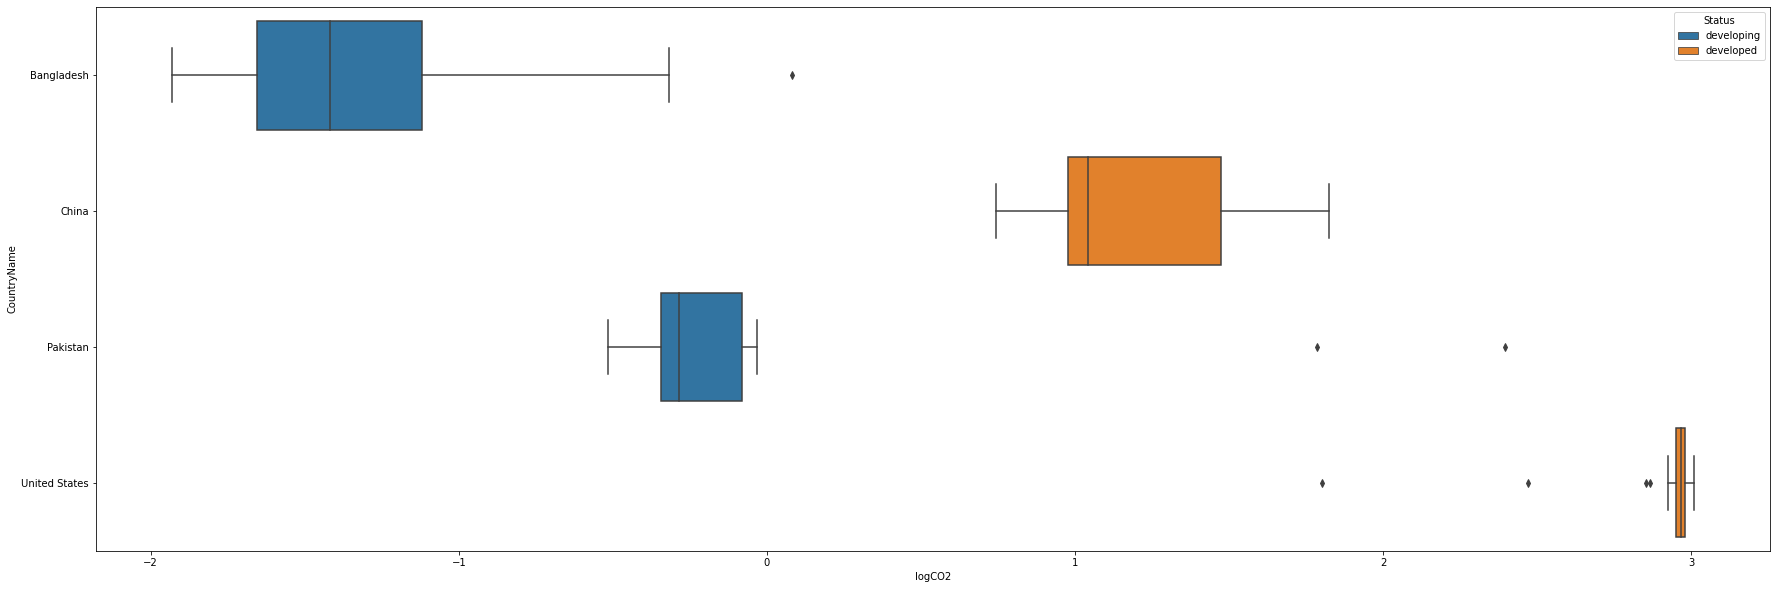

In [ ]:
data
fig_dims = (30, 10)
fig, ax = plt.subplots(figsize=fig_dims)
data['logCO2'] = np.log(data['CO2Emissions']) 
ax = sns.boxplot( x='logCO2', y='CountryName', hue='Status',
                 data=data, dodge=False, ax=ax)


CO2-> higher - developed, less - developing

PM2.5 -> higher - developing

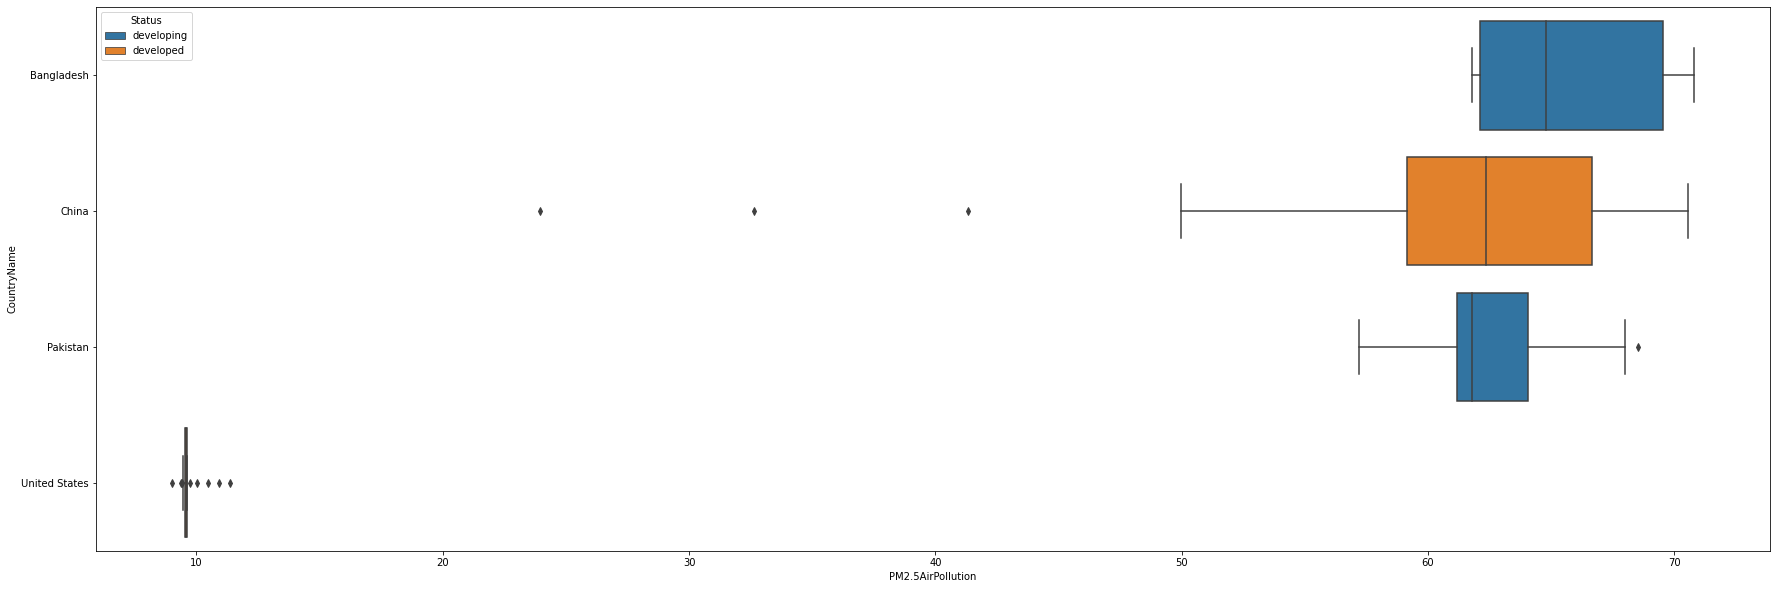

In [ ]:
fig_dims = (30, 10)
fig, ax = plt.subplots(figsize=fig_dims)
# data['logPM2.5'] = np.log(data['PM2.5AirPollution']) 
ax = sns.boxplot( x='PM2.5AirPollution', y='CountryName', hue='Status',
                 data=data, dodge=False, ax=ax)

CO2-> higher - developed, less - developing

PM2.5 -> higher - developing

Correlation analysis to see which air pollutant has more impact from the two

In [ ]:
x = developed[['DeathRate', 'CO2Emissions', 'PM2.5AirPollution', 'Status']].corr()
x
y = developing[['DeathRate', 'CO2Emissions', 'PM2.5AirPollution', 'Status']].corr()
y

,DeathRate,CO2Emissions,PM2.5AirPollution
DeathRate,1.000000,-0.127520,-0.899913
CO2Emissions,-0.127520,1.000000,0.018711
PM2.5AirPollution,-0.899913,0.018711,1.000000


Text(0.5, 1.0, 'Developing')

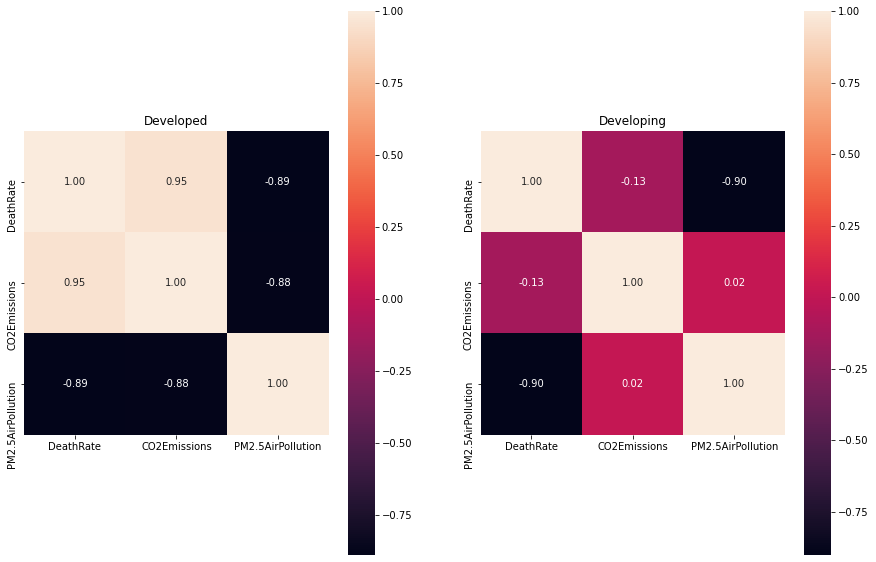

In [ ]:
##########Corelation matrix between Death rate vs PM2.5 AND Death rate vs CO2 to see which one has more impact in all the countries

fig,ax= plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(15,10)
sns.heatmap(x,square=True,annot=True, fmt='.2f', ax = ax[0])
ax[0].set_title('Developed')


# fig,ax= plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(15,10)
sns.heatmap(y,square=True,annot=True, fmt='.2f', ax = ax[1])
ax[1].set_title('Developing')



CO2-> higher - developed, less - developing

PM2.5 -> higher - developing

# Analysing the relation between the death rate vs Improved Water Quality and death rate vs Improved Sanitation in developing and under-developed countries. Which one of these two helped in reducing the death rate the most?

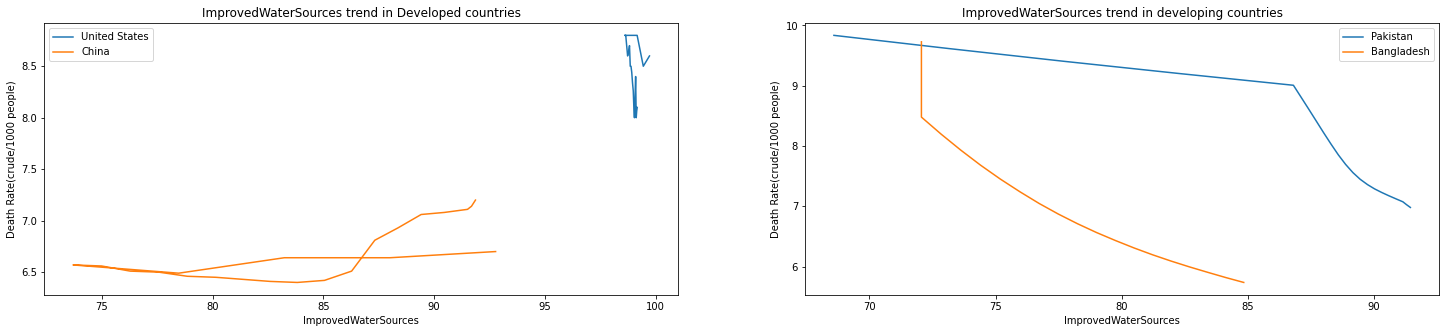

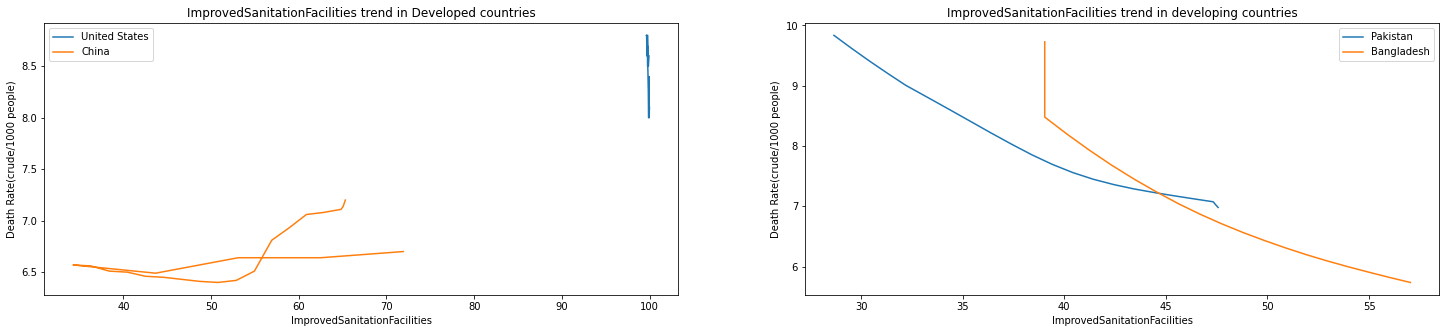

In [ ]:
# DEVELOPED COUNTRIES
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(25, 5))
for name in ['United States','China']:
    ax[0].plot(data[data.CountryName==name].ImprovedWaterSources,data[data.CountryName==name].DeathRate,label=name)

ax[0].set_xlabel("ImprovedWaterSources")
ax[0].set_ylabel("Death Rate(crude/1000 people)")
ax[0].set_title('ImprovedWaterSources trend in Developed countries')
ax[0].legend(loc='best')

# DEVELOPING COUNTRIES
for name in ['Pakistan','Bangladesh']:
    ax[1].plot(data[data.CountryName==name].ImprovedWaterSources,data[data.CountryName==name].DeathRate,label=name)

ax[1].set_xlabel("ImprovedWaterSources")
ax[1].set_ylabel("Death Rate(crude/1000 people)")
ax[1].set_title('ImprovedWaterSources trend in developing countries')
ax[1].legend(loc='best')


# DEVELOPED COUNTRIES
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(25, 5))
for name in ['United States','China']:
    ax[0].plot(data[data.CountryName==name].ImprovedSanitationFacilities,data[data.CountryName==name].DeathRate,label=name)

ax[0].set_xlabel("ImprovedSanitationFacilities")
ax[0].set_ylabel("Death Rate(crude/1000 people)")
ax[0].set_title('ImprovedSanitationFacilities trend in Developed countries')
ax[0].legend(loc='best')

# DEVELOPING COUNTRIES
for name in ['Pakistan','Bangladesh']:
    ax[1].plot(data[data.CountryName==name].ImprovedSanitationFacilities,data[data.CountryName==name].DeathRate,label=name)

ax[1].set_xlabel("ImprovedSanitationFacilities")
ax[1].set_ylabel("Death Rate(crude/1000 people)")
ax[1].set_title('ImprovedSanitationFacilities trend in developing countries')
ax[1].legend(loc='best')

In [ ]:
dev = developed[['DeathRate', 'ImprovedWaterSources', 'ImprovedSanitationFacilities']].corr()
dev1 = developing[['DeathRate', 'ImprovedWaterSources', 'ImprovedSanitationFacilities']].corr()

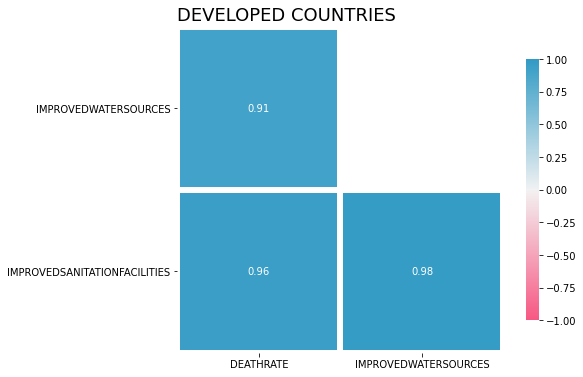

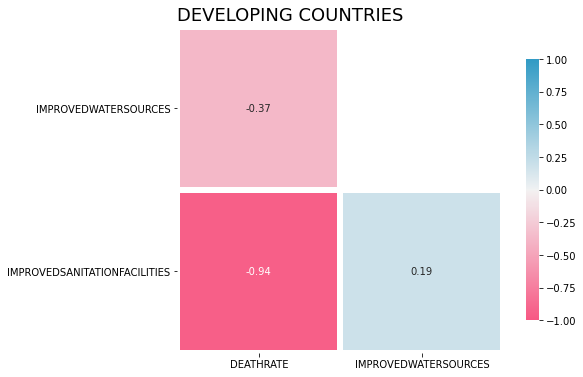

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
# mask
mask = np.triu(np.ones_like(dev, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = dev.iloc[1:,:-1].copy()
# color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", 
           linewidths=5, cmap=cmap, vmin=-1, vmax=1, 
           cbar_kws={"shrink": .8}, square=True)
# ticks
yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)
# title
title = 'DEVELOPED COUNTRIES'
plt.title(title, loc='left', fontsize=18)
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
# mask
mask = np.triu(np.ones_like(dev1, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = dev1.iloc[1:,:-1].copy()
# color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", 
           linewidths=5, cmap=cmap, vmin=-1, vmax=1, 
           cbar_kws={"shrink": .8}, square=True)
# ticks
yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)
# title
title = 'DEVELOPING COUNTRIES'
plt.title(title, loc='left', fontsize=18)
plt.show()

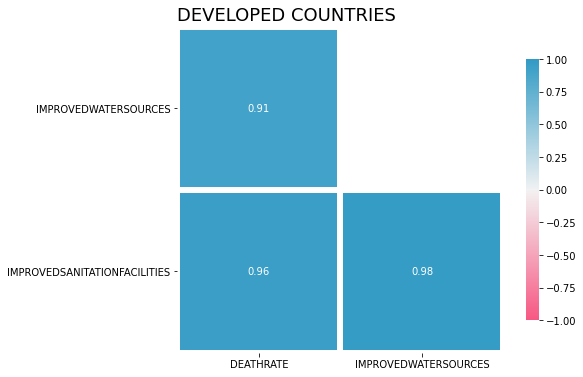

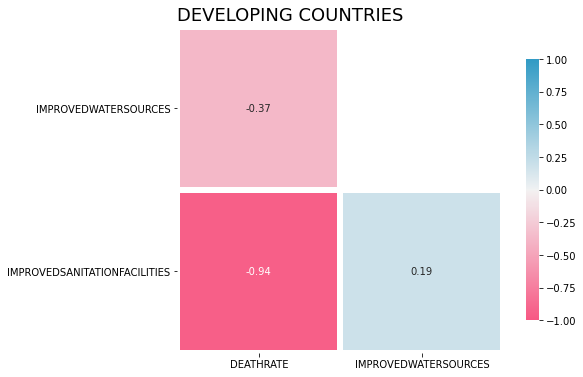

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
# mask
mask = np.triu(np.ones_like(dev, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = dev.iloc[1:,:-1].copy()
# color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", 
           linewidths=5, cmap=cmap, vmin=-1, vmax=1, 
           cbar_kws={"shrink": .8}, square=True)
# ticks
yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)
# title
title = 'DEVELOPED COUNTRIES'
plt.title(title, loc='left', fontsize=18)
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
# mask
mask = np.triu(np.ones_like(dev1, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = dev1.iloc[1:,:-1].copy()
# color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", 
           linewidths=5, cmap=cmap, vmin=-1, vmax=1, 
           cbar_kws={"shrink": .8}, square=True)
# ticks
yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)
# title
title = 'DEVELOPING COUNTRIES'
plt.title(title, loc='left', fontsize=18)
plt.show()

Developing - line plots show an inverse relation. 

Magnitude of Sanitation is higher which shows that sanitation has more impact contrary to water resources.

**HEALTH EXPENDITURE HEATMAP**

In [ ]:
dev = developed[['DeathRate', 'HealthExpenditure']].corr()
dev1 = developing[['DeathRate', 'HealthExpenditure']].corr()

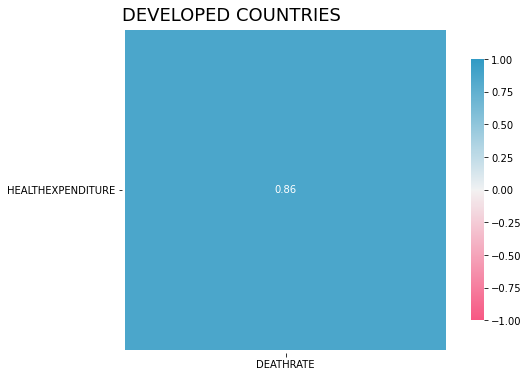

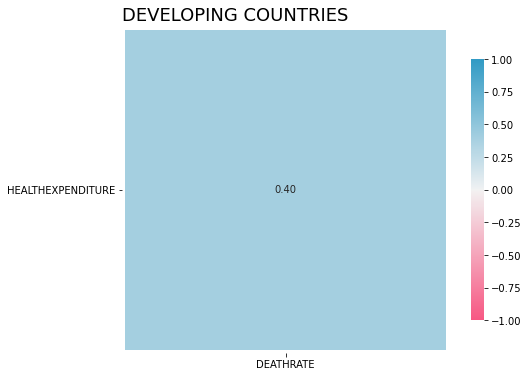

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
# mask
mask = np.triu(np.ones_like(dev, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = dev.iloc[1:,:-1].copy()
# color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", 
           linewidths=5, cmap=cmap, vmin=-1, vmax=1, 
           cbar_kws={"shrink": .8}, square=True)
# ticks
yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)
# title
title = 'DEVELOPED COUNTRIES'
plt.title(title, loc='left', fontsize=18)
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
# mask
mask = np.triu(np.ones_like(dev1, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = dev1.iloc[1:,:-1].copy()
# color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", 
           linewidths=5, cmap=cmap, vmin=-1, vmax=1, 
           cbar_kws={"shrink": .8}, square=True)
# ticks
yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)
# title
title = 'DEVELOPING COUNTRIES'
plt.title(title, loc='left', fontsize=18)
plt.show()

# Did the health expenditure have a greater impact on the death rate in developing countries? Comparision of correlation matrix between the 4 countries.

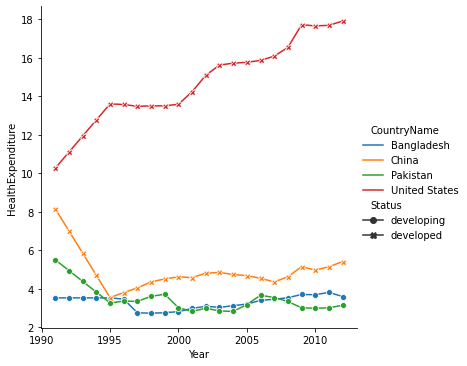

In [ ]:
sns.relplot(x="Year", y="HealthExpenditure", style="Status", hue="CountryName", dashes=False, markers=True, kind="line", data=data);

In [ ]:
c = ch[['DeathRate', 'HealthExpenditure']].corr()
p = pk[['DeathRate', 'HealthExpenditure']].corr()
u = us[['DeathRate', 'HealthExpenditure']].corr()
b = bgd[['DeathRate', 'HealthExpenditure']].corr()



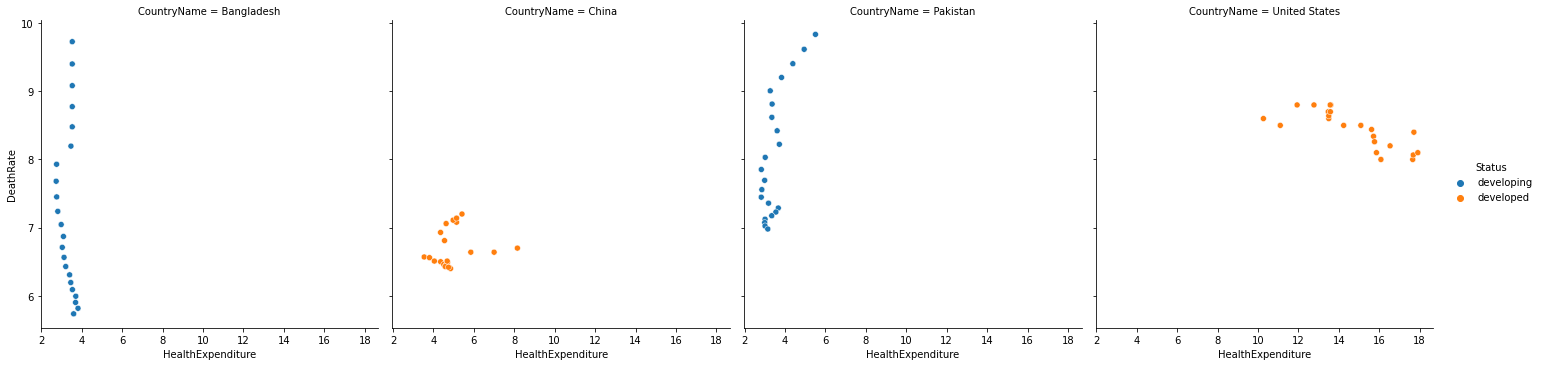

In [ ]:
sns.relplot(x="HealthExpenditure", y="DeathRate", hue="Status",
            col="CountryName", data=data);

Text(0.5, 1.0, 'Bangladesh')

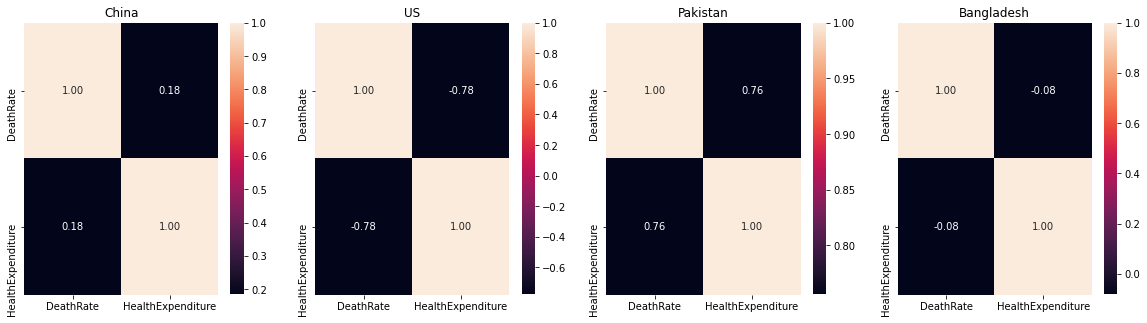

In [ ]:

fig,ax= plt.subplots(nrows=1, ncols=4)
fig.set_size_inches(20,5)
sns.heatmap(c,square=False,annot=True, fmt='.2f',  ax = ax[0])
ax[0].set_title('China')

sns.heatmap(u,square=False,annot=True, fmt='.2f',ax = ax[1])
ax[1].set_title('US')

sns.heatmap(p,square=False,annot=True, fmt='.2f',ax = ax[2])
ax[2].set_title('Pakistan')

sns.heatmap(b,square=False,annot=True, fmt='.2f',ax = ax[3])
ax[3].set_title('Bangladesh')



# Of all the variables we have analysed above, which one had the most impact on the death rate? 

In [ ]:
!pip install heatmapz
from heatmap import heatmap, corrplot

Text(0.5, 1.0, 'Developing')

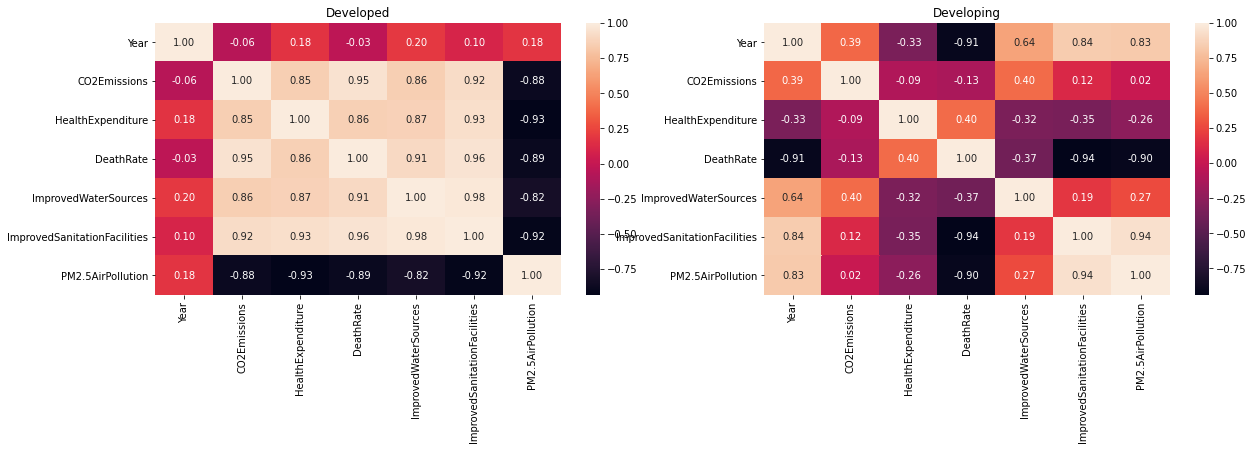

In [ ]:




fig,ax= plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(20,5)
sns.heatmap(developed.corr(),square=False,annot=True, fmt='.2f',  ax = ax[0])
ax[0].set_title('Developed')

sns.heatmap(developing.corr(),square=False,annot=True, fmt='.2f',  ax = ax[1])
ax[1].set_title('Developing')

In the developed countries, we see that **CO2 is directly proportional (+0.95) to the death rate.** This implies that if we reduce CO2 emissions, our death rate will decrease the most in comparison to other .


In the developing countries, we see that **an increment in the sanitation facilities will cause the most decrease in the death rate** with a factor of -0.94.



# **MODELLING**

## Data Pre-processing

In [ ]:
# Convert developed to 1 and under-developed to 0 in Status
data.loc[data['Status'] == 'developed', 'Status'] = 1
data.loc[data['Status'] == 'developing', 'Status'] = 0
data['Status'] = pd.to_numeric(data['Status'])

**MinMax Scaling**

In [ ]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Segregate features and values into separate variables
features = data.drop(columns=['CountryName', 'DeathRate', 'logCO2']).to_numpy()
values = data['DeathRate'].to_numpy()

# Instantiate MinMaxScaler and use it to normzlize attributes
scalerFeatures = MinMaxScaler()
scalerFeatures.fit(features)
features = scalerFeatures.transform(features)

scalerValues = MinMaxScaler()
scalerValues.fit(np.reshape(values, (-1, 1)))
values = np.reshape(scalerValues.transform(np.reshape(values, (-1, 1))), -1)

**Splitting Data**

In [ ]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, values, test_size=0.3, random_state=40)

# Model Learning
**Model-Fitting**

In [ ]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Instantiate a LogisticRegression classifier with default parameter values
linreg = LinearRegression()

# Fit logreg to the train set
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Prediction on test data**

In [ ]:
# Import metrics
from sklearn import metrics

# Use linreg to predict instances from the test set and train set
y_test_pred = linreg.predict(X_test)
y_train_pred = linreg.predict(X_train)

# Get the R^2 score of linreg model and print it
print("R^2 score of linear regression model: ", linreg.score(X_test, y_test))
print("Maximum error of the model on test data: ", metrics.max_error(y_test, y_test_pred))
print("Mean absolute error of the model: ", metrics.mean_absolute_error(y_test, y_test_pred))

R^2 score of linear regression model:  0.8033424444230667
Maximum error of the model on test data:  0.29636977786535723
Mean absolute error of the model:  0.08536880305787331


**Residual Plot**

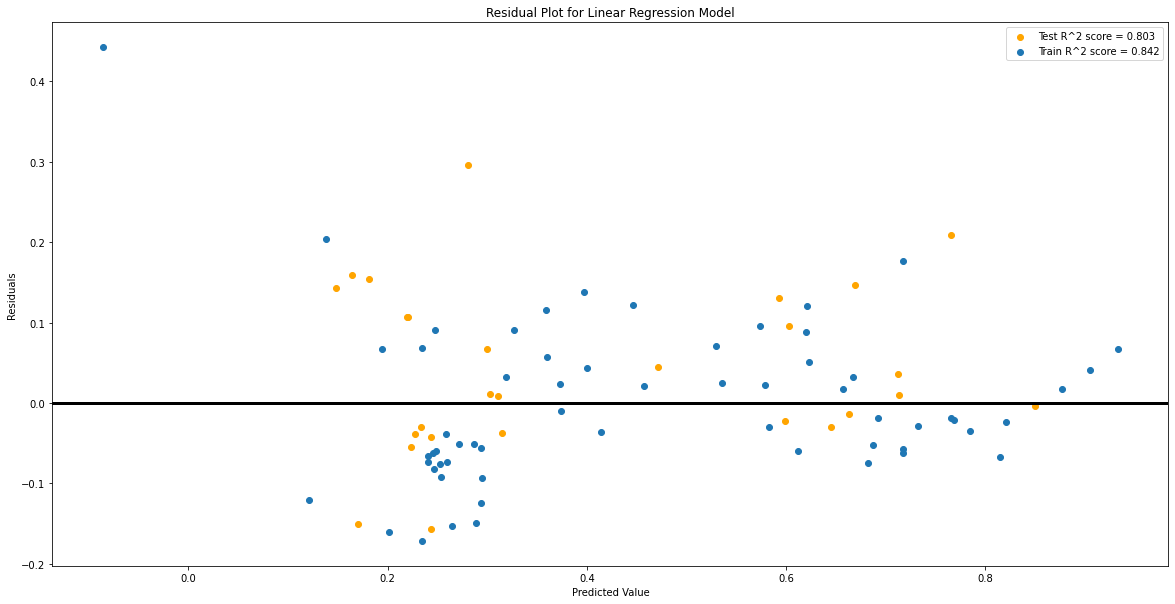

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(y_test_pred, y_test-y_test_pred, color='orange', label='Test R^2 score = %0.3f' %round(linreg.score(X_test, y_test), 3))
plt.scatter(y_train_pred, y_train-y_train_pred, label='Train R^2 score = %0.3f' %round(linreg.score(X_train, y_train), 3))
plt.axhline(linewidth=3, color='black')
plt.title('Residual Plot for Linear Regression Model')
plt.xlabel('Predicted Value')
plt.ylabel('Residuals')
plt.legend()
plt.show()

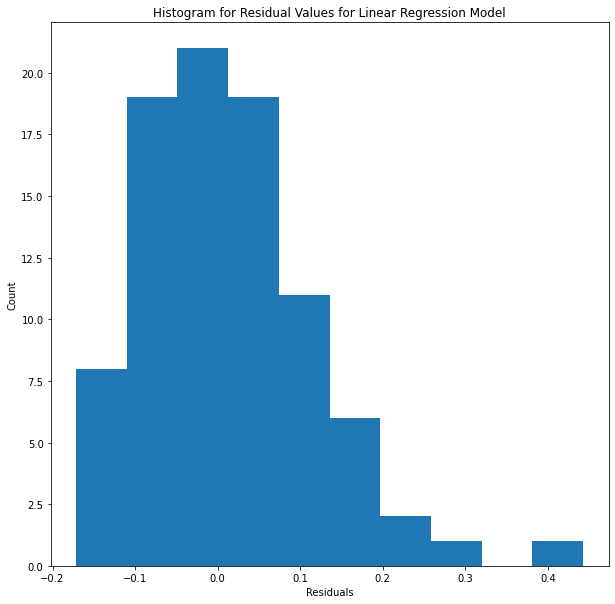

In [ ]:
plt.figure(figsize=(10,10))
plt.hist(np.concatenate((y_test-y_test_pred, y_train-y_train_pred)), 10)
plt.title('Histogram for Residual Values for Linear Regression Model')
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.show()

## **Prediction over Years**

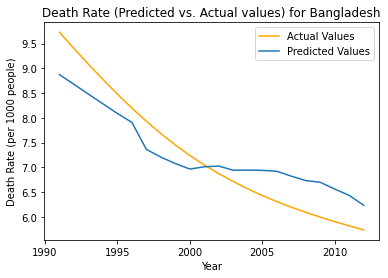

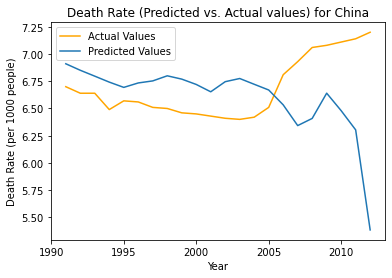

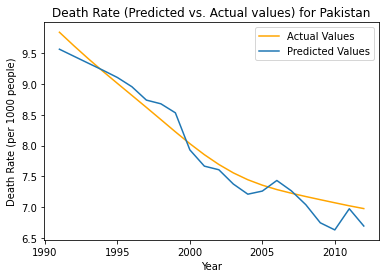

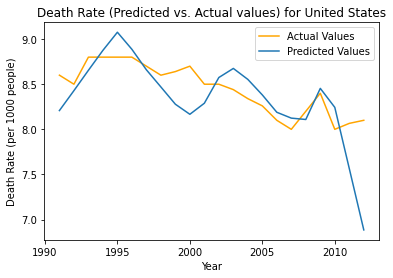

In [ ]:
for country in data['CountryName'].unique():
    temp = data[data['CountryName'] == country]
    tempfeatures = scalerFeatures.transform(temp.drop(columns=['CountryName', 'DeathRate', 'logCO2']).to_numpy())
    tempvalues = temp['DeathRate'].to_numpy()
    temppred = linreg.predict(tempfeatures)
    temppred = np.reshape(scalerValues.inverse_transform(np.reshape(temppred, (-1, 1))), -1)
    plt.plot(list(range(1991, 2013)), tempvalues, color='orange', label='Actual Values')
    plt.plot(list(range(1991, 2013)), temppred, label='Predicted Values')
    plt.title('Death Rate (Predicted vs. Actual values) for '+country)
    plt.xlabel('Year')
    plt.ylabel('Death Rate (per 1000 people)')
    plt.legend()
    plt.show()